In [130]:
#hw1
#we will start by importing some libraries
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

In [131]:
#loads our dataset to the variable
wine_data = pd.read_csv('wine_quality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


In [132]:
#some additional statistical data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


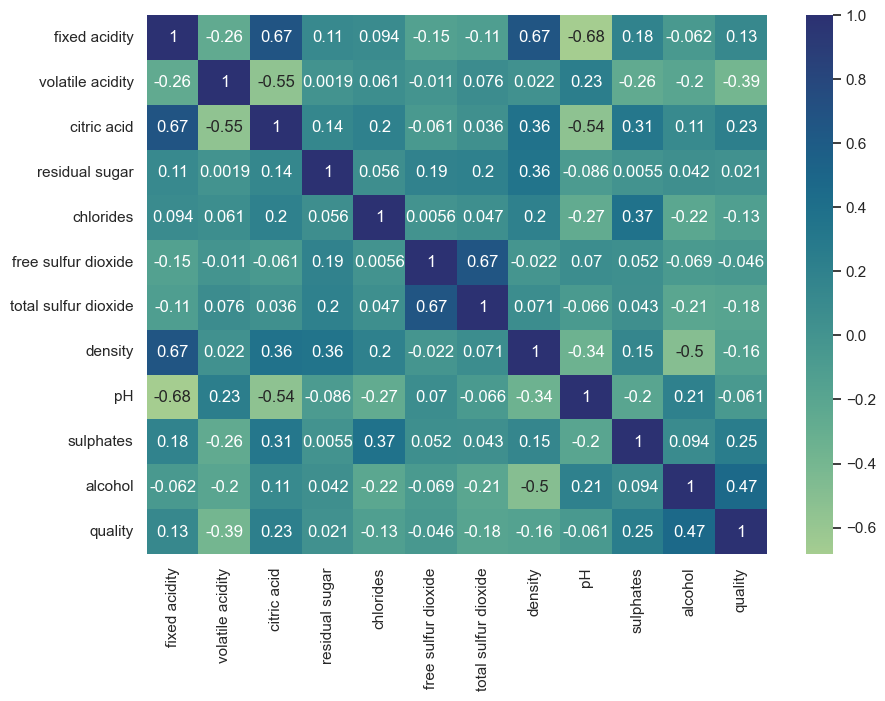

In [133]:
#we will produce a heatmap using the correlation matrix
sns.heatmap(wine_data.corr(), annot=True, cmap="crest")
plt.show()

Q1.) This heatmap provides the correlation between different variables. Fixed Acidity and pH seem to have the highest correlation if you discount the correlation between variables and themselves. Most of these variables don't have extremely strong correlations. For example the correlation between chlorides and free sulfur dioxide is very weak. There is no cases of multi collinearity.

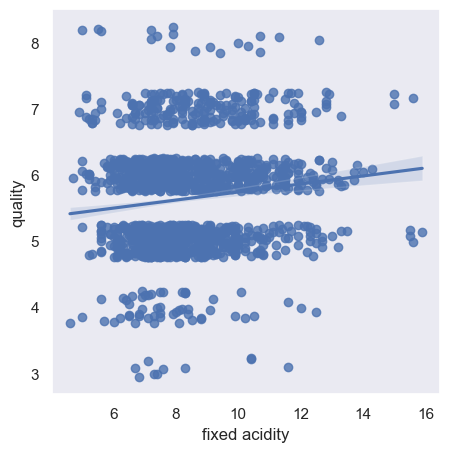

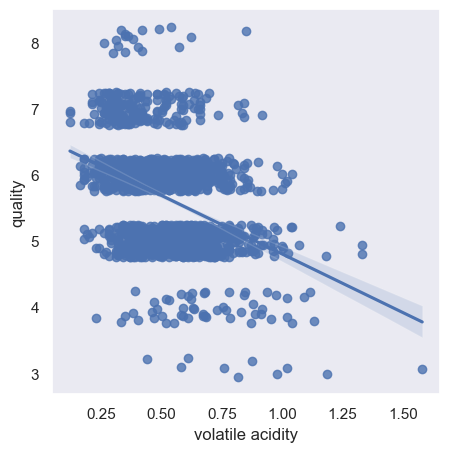

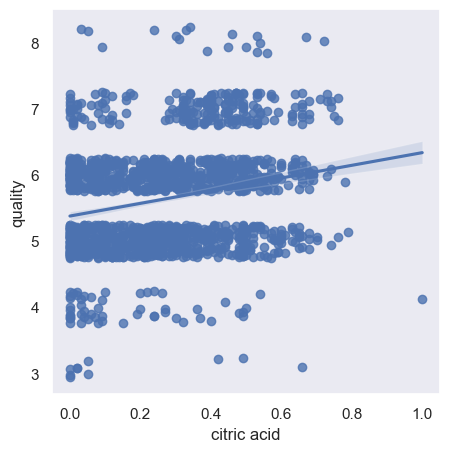

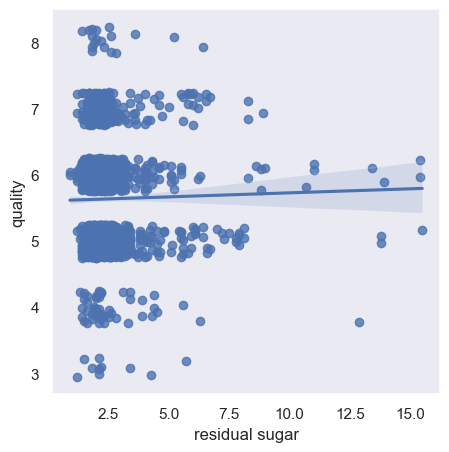

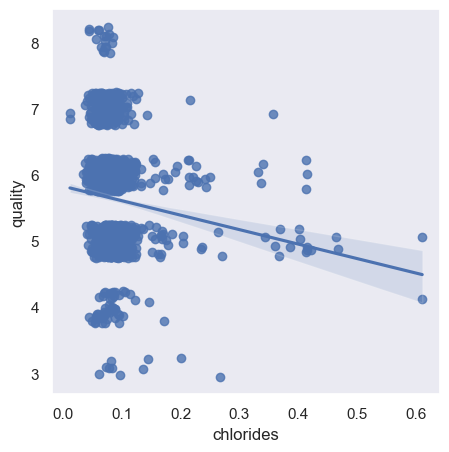

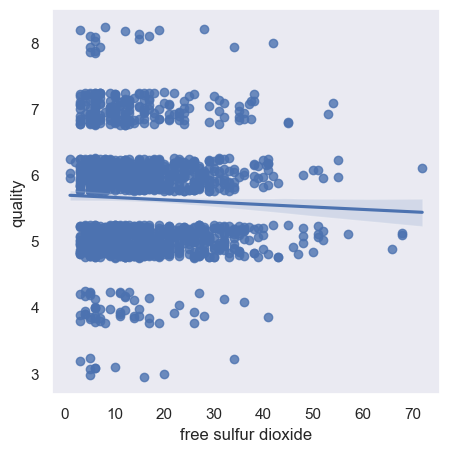

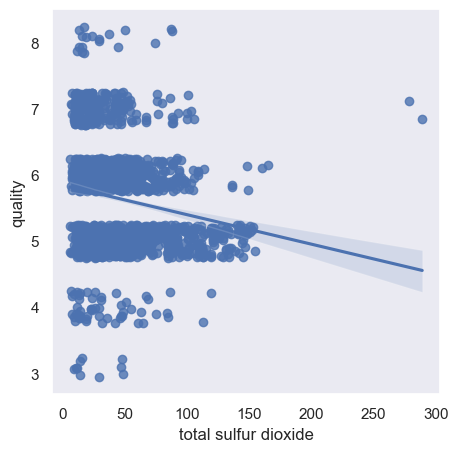

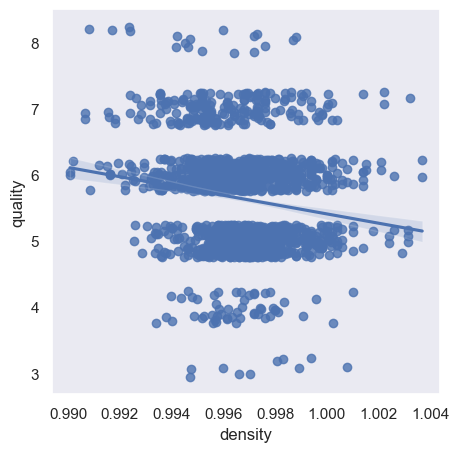

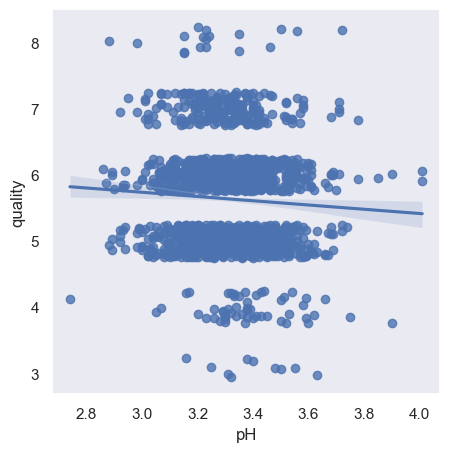

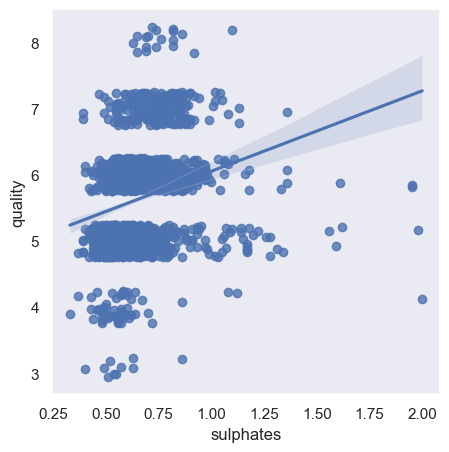

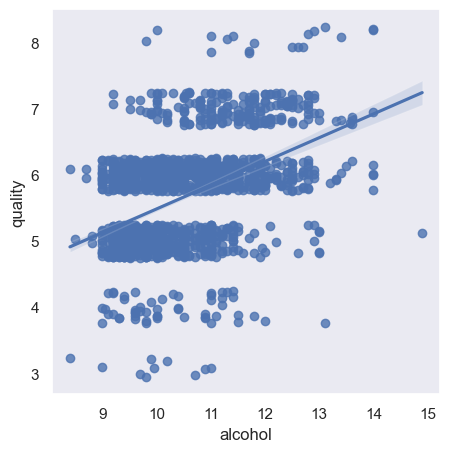

In [134]:

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
sns.set_style('dark')


for x in range(len(features)):
    f, axs = plt.subplots(figsize = (5,5))
    sns.regplot(x = wine_data[features[x]], y = wine_data['quality'], data= wine_data)

Q2) What sticks out to me the most is that data points for all the features are seperated into clusters which kind of weakens the correlation and the line of best-fit. The feature that has the strongest relationship with quantity is alcohol based on how closely the line of best-fit fits with the data.

Q3) The finding that alcohol has the strongest relationship with quality based on the line of fit corresponds correctly with the corellation matrix. The correlation matrix does not tell us how the data points are seperated into clusters, which can give us some more insight into the relationship between the features and quality instead of purely looking at the correlation.

In [135]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


In [136]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


In [137]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [138]:
wine_data.isna().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


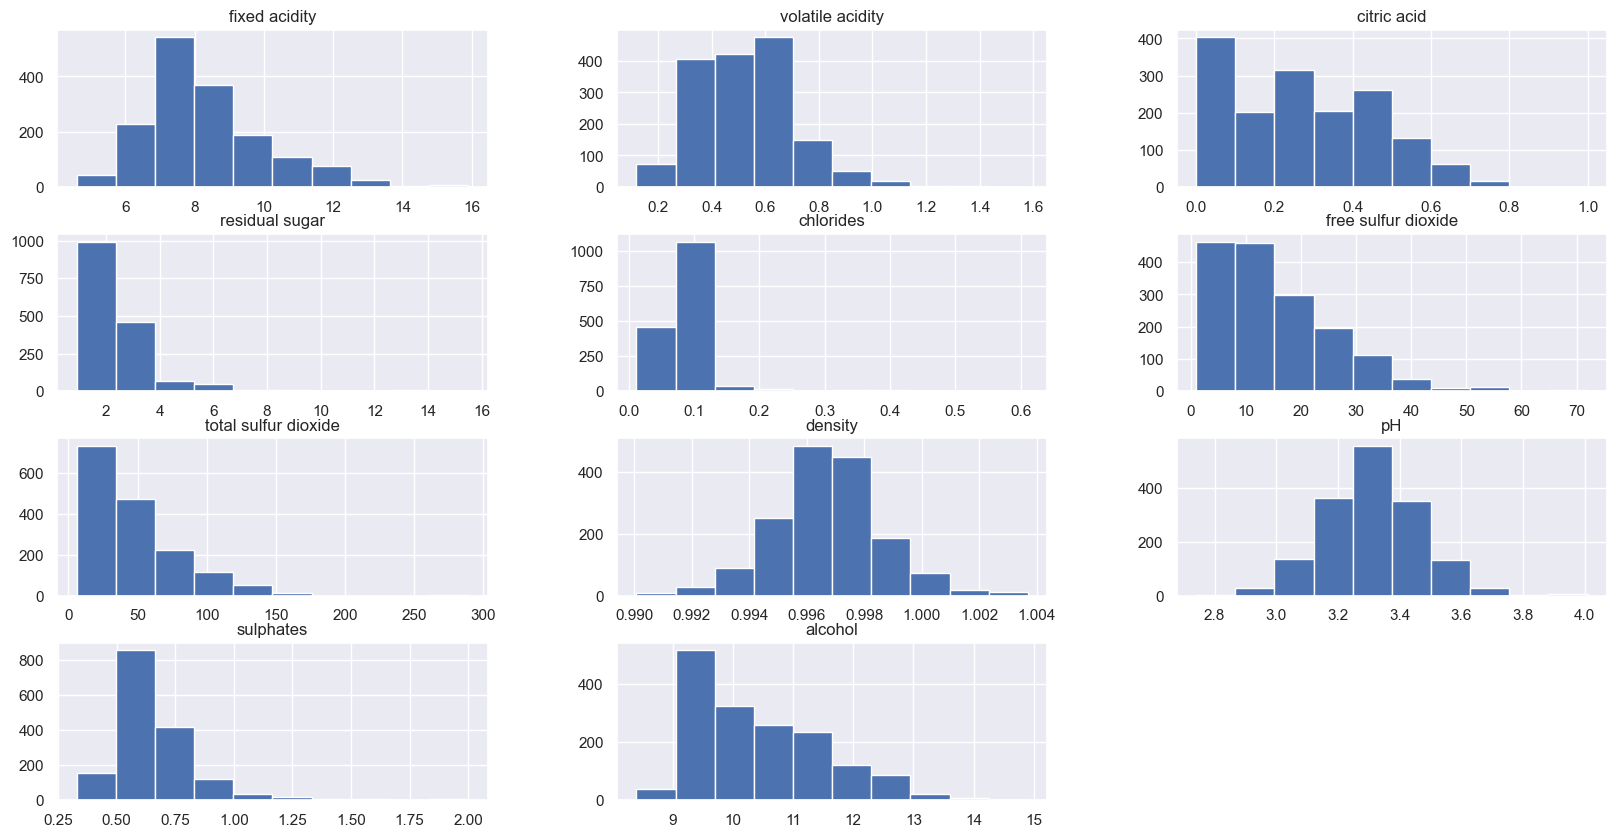

In [139]:
wine_data[features].hist(figsize = (20,10))
plt.show()

Q4.) 
There seems to be no missing values in the dataset. Even though Citric Acid has a data point equal to zero it seems like the zero isn't invalid and appropiate to include in the data.

If there were missing values however, I would replace all the missing values for every feature EXCEPT pH and density with the median instead of the mean. This is because a skewed dataset is more likely to have its mean be influenced by outliers and thus the mean be represenative of the data_set as a whole. For density and pH, however replacing the missing values with the mean would be fine.

Q5.) There are no categorical variables in the dataset

In [140]:
#there are no categorical variables to encode

In [141]:
X_unscaled = pd.DataFrame(wine_data)
X_unscaled = X_unscaled.drop(['quality'], axis=1)
y_unscaled = ['quality']
print('X_unscaled columns:',end='')
print (X_unscaled.columns)

X_unscaled columns:Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [142]:
scaler = MinMaxScaler()
# using min max scaler
model = scaler.fit(X_unscaled)
X_mm = model.transform(X_unscaled)

In [143]:
scaler = StandardScaler()
# using standard scaler
model = scaler.fit(X_unscaled)
X_ss = model.transform(X_unscaled)

Q6.)The standard scaler assumes features are normally distributed and will scale them to have a mean 0 and standard deviation of 1. This might be important when we are using models to make predictions and standard scaling might not be appropiate for data that is not normally distributed. Most of the data we have is also not normally distributed

Q7.) I predict Linear regression on scaled data to be more accurate since scaled data is "closer" to each other and within a range and Linear regression will more loosely fit unscaled data.

In [144]:
pd.DataFrame(data=X_ss, columns = features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [145]:
pd.DataFrame(data=X_mm, columns = features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [146]:
from sklearn.model_selection import train_test_split

X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine_data['quality']

train_X_unscaled, test_X_unscaled, train_Y_unscaled, test_Y_unscaled = train_test_split(X, y, test_size=0.3)
train_X_ss, test_X_ss, train_Y_ss, test_Y_ss = train_test_split(X, y, test_size=0.3)
train_X_mm, test_X_mm, train_Y_mm, test_Y_mm = train_test_split(X, y, test_size=0.3)

In [147]:
#creates our linear regression model
lm = LinearRegression()
lm.fit(train_X_unscaled,train_Y_unscaled)

LinearRegression()

In [148]:
#we will be testing linear regression on unscaled data
predictions = lm.predict(test_X_unscaled)
residuals = test_Y_unscaled - predictions

Text(0, 0.5, 'True Values')

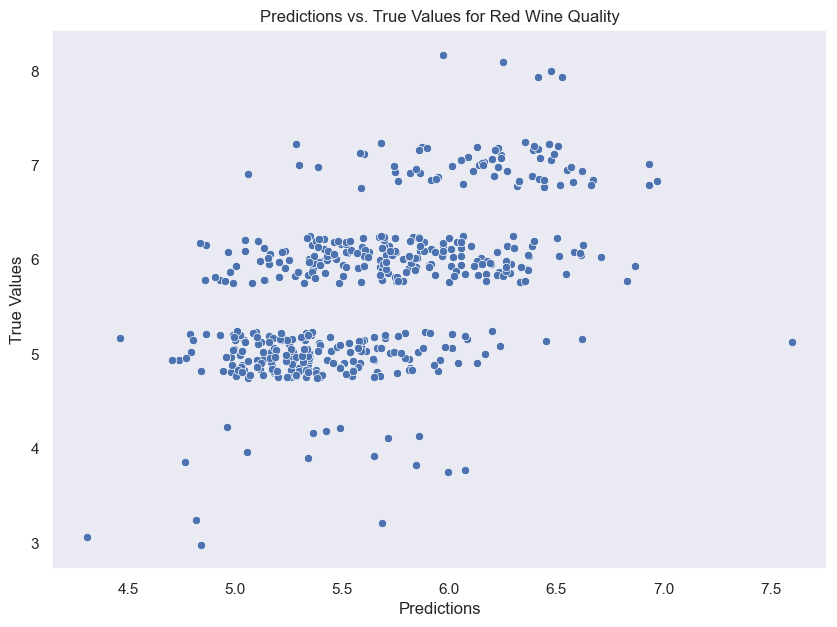

In [149]:

sns.scatterplot(x=predictions, y = test_Y_unscaled)
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel('Predictions')
plt.ylabel('True Values')

Text(0.5, 1.0, 'Residuals for Linear Model on Test Set')

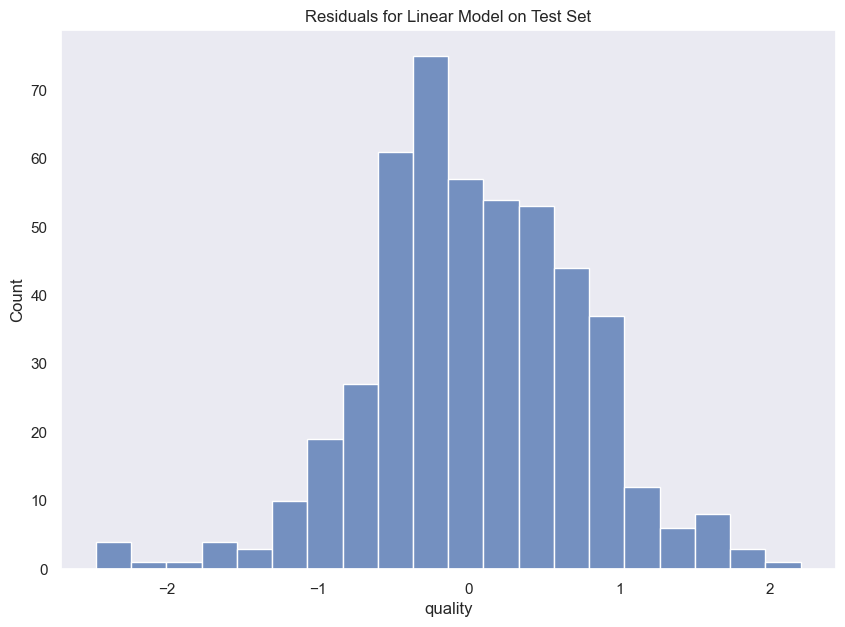

In [150]:
sns.histplot(residuals)
plt.title('Residuals for Linear Model on Test Set')

In [151]:
from sklearn.metrics import r2_score
print('R-squared value Score: ', r2_score(test_Y_unscaled, predictions))

R-squared value Score:  0.2803324547018897


In [152]:
#we will be testing linear regression on standardscaled data
lm_ss = LinearRegression()
lm_ss.fit(train_X_ss,train_Y_ss)

LinearRegression()

In [153]:
#we will be testing linear regression on standardscaled data
predictions = lm_ss.predict(test_X_ss)
residuals = test_Y_ss - predictions

Text(0, 0.5, 'True Values')

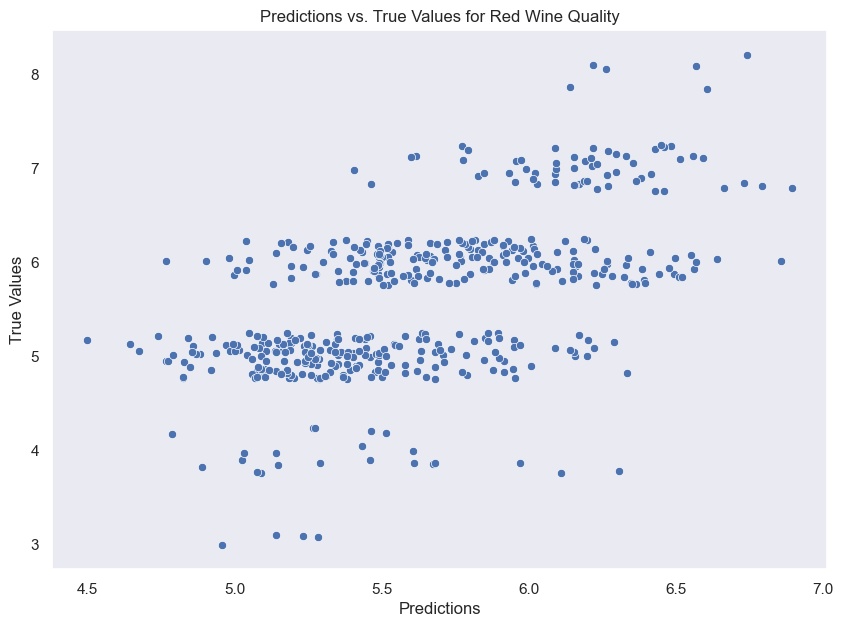

In [154]:
sns.scatterplot(x=predictions, y = test_Y_ss)
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel('Predictions')
plt.ylabel('True Values')

Text(0.5, 1.0, 'Residuals for Linear Model on Test Set')

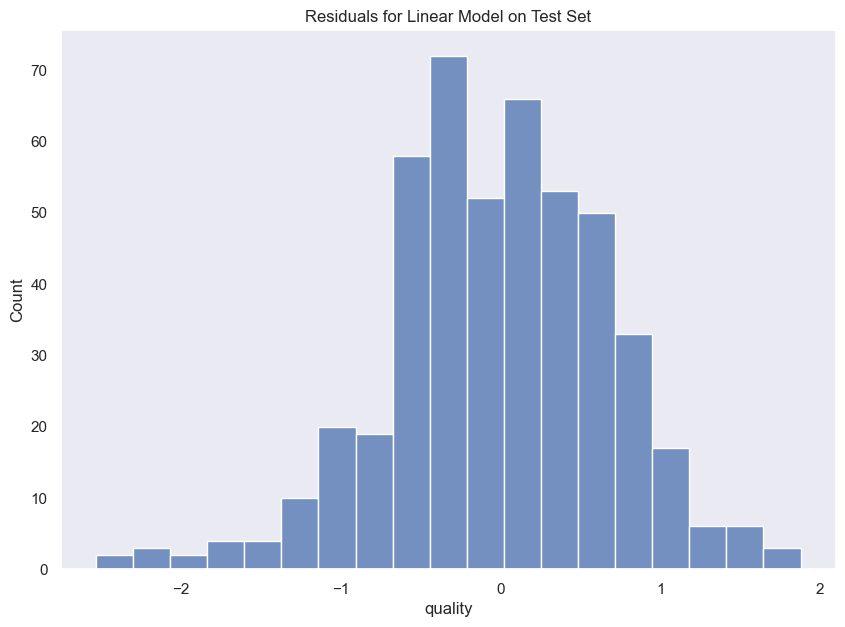

In [155]:
sns.histplot(residuals)
plt.title('Residuals for Linear Model on Test Set')

In [156]:
print('R-squared value Score: ', r2_score(test_Y_ss, predictions))

R-squared value Score:  0.3287751372230381


In [157]:
#testing on minmax scaled data
lm_mm = LinearRegression()
lm_mm.fit(train_X_mm,train_Y_mm)

LinearRegression()

In [158]:
#we will be testing linear regression on minmax scaled data
predictions = lm_mm.predict(test_X_mm)
residuals = test_Y_mm - predictions

Text(0, 0.5, 'True Values')

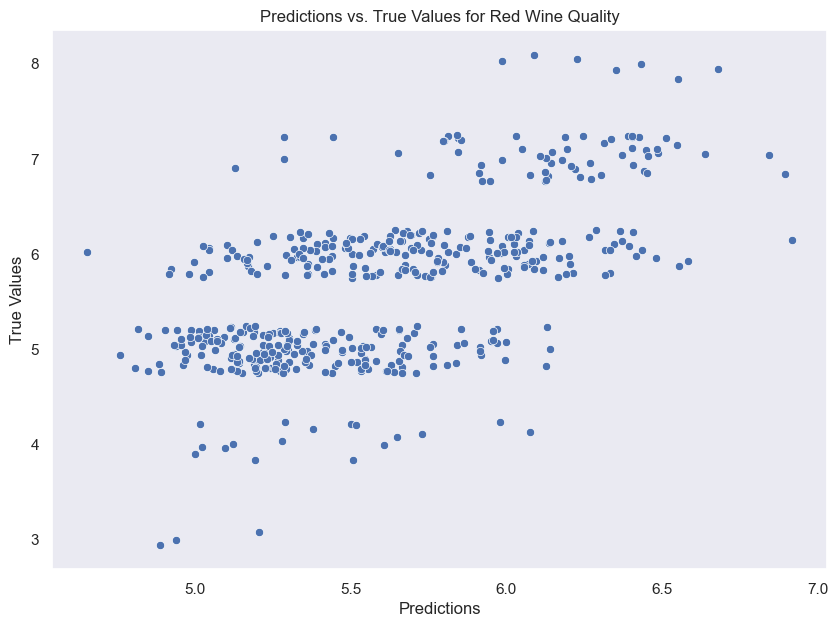

In [159]:
sns.scatterplot(x=predictions, y = test_Y_mm)
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel('Predictions')
plt.ylabel('True Values')

Text(0.5, 1.0, 'Residuals for Linear Model on Test Set')

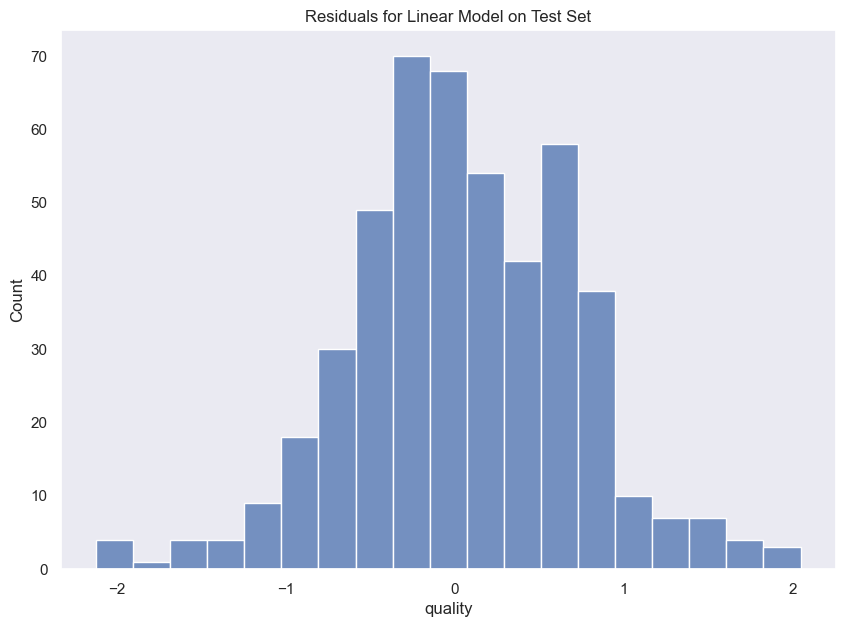

In [160]:
sns.histplot(residuals)
plt.title('Residuals for Linear Model on Test Set')

In [161]:
print('R-squared value Score: ', r2_score(test_Y_mm, predictions))

R-squared value Score:  0.36095865120414294


In [170]:
coeff_df = pd.DataFrame(data={'features':features, 'Unscaled': lm.coef_, 'StdScaler': lm_ss.coef_, 'MinMaxScaler': lm_ss.coef_})
coeff_df

,features,Unscaled,StdScaler,MinMaxScaler
0,fixed acidity,0.025276,0.004608,0.004608
1,volatile acidity,-1.097892,-0.983924,-0.983924
2,citric acid,-0.164064,-0.028388,-0.028388
3,residual sugar,0.023710,0.038891,0.038891
4,chlorides,-1.725252,-2.670201,-2.670201
5,free sulfur dioxide,0.003822,0.001503,0.001503
6,total sulfur dioxide,-0.003078,-0.003042,-0.003042
7,density,-13.029285,-6.561288,-6.561288
8,pH,-0.432620,-0.299212,-0.299212
9,sulphates,0.965572,0.935293,0.935293


 Q8.) The R^2 value is the proportion of variance in the dependent variable(quality) that can be explained by the independent variable (the other features). In our models the R^2 value explains how much the variance in quality can be explained by our features such as citrics acids,chlorides,etc. 

Q9.) The linear regression model for the MinMaxScaler model performed the best since it has the highest R^2 value of 0.36095865120414294 with Standard Scaler following at a close second. Our un scaled data performed the worst with the lowest R^2 value of 0.2803324547018897.

Q10.) Different standardizing techniques produce different results since they have different ways of making the data fit "closer" to each other. For example, StandardScaler removes the mean and scales each feature/variable to unit variance so it is more likely to be influenced by outliers in the way it standardizes the data. On the other hand, The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

Report

The data I was trying to analyze was the wine_quality data set. There were no missing values in the data as well as no collinearity and we set the quality column of the dataset as the dependent variable and every other feature as the independent variables. We try to the relationship between the quality with the other independent variables using linear regression and used unscaled data as well as standardize data using the MinMaxScaler and StandardScaler method of standardization.

We analyzed each unscaled data, standard scaled data, and minmax scaled data with Linear Regression. If we compare the scatter plots of true values vs prediction we can see that the standardize data are more closer together. Also our Linear Regression models are slightly stronger for the standardized data, since the R^2 values was higher for the MinMax Scaler model with 0.36095865120414294 and StandardScaler Model with 0.3287751372230381. The R^2 value was weakest for the model with unscaled data which was what I initially expected.

I also expected the StandardScaler model to less strongly fit the data compared to MinMax. This is because the StandardScaler works best on models that are normally distributed and is easily influenced by outliers. Most of our data was skewed if we observed earlier in the lab for the scatterplots for each independent variable vs quality, so it makes sense that the Linear Regression Model was a little less accurate for StandardScaler compared to MinMax. It also makes sense that the Linear Regression Model fits less closely with the Unscaled Data since we use standardization to "fix" data with large differences 

